ПЕРВОЕ

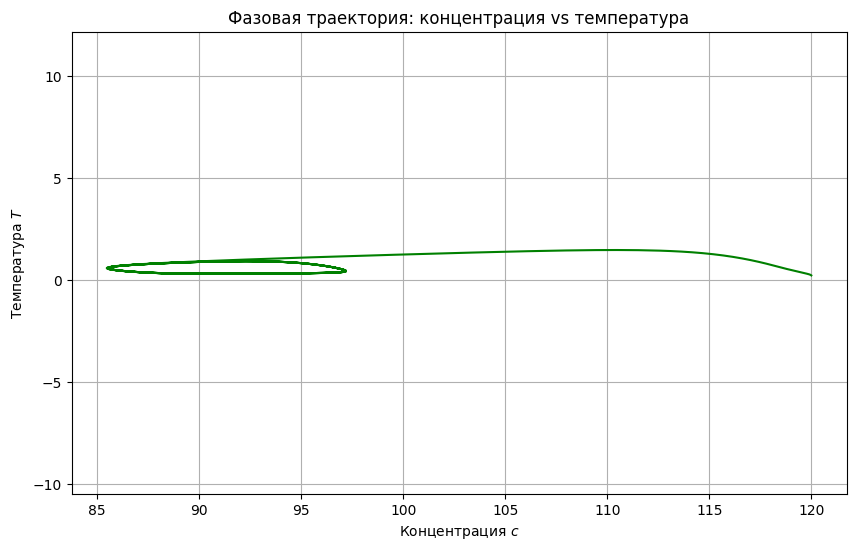

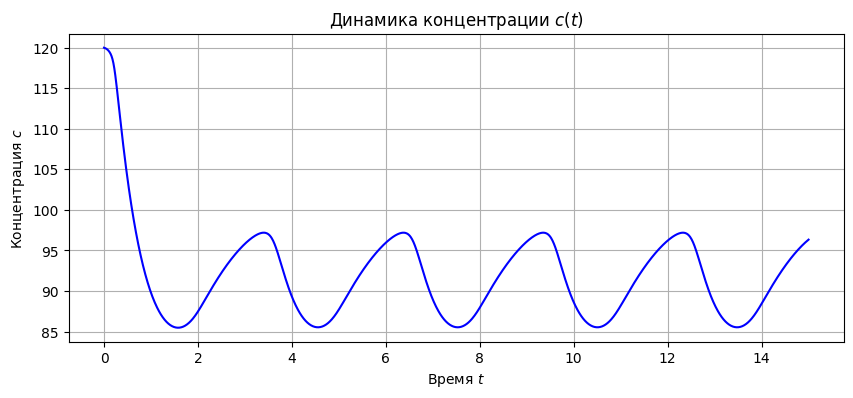

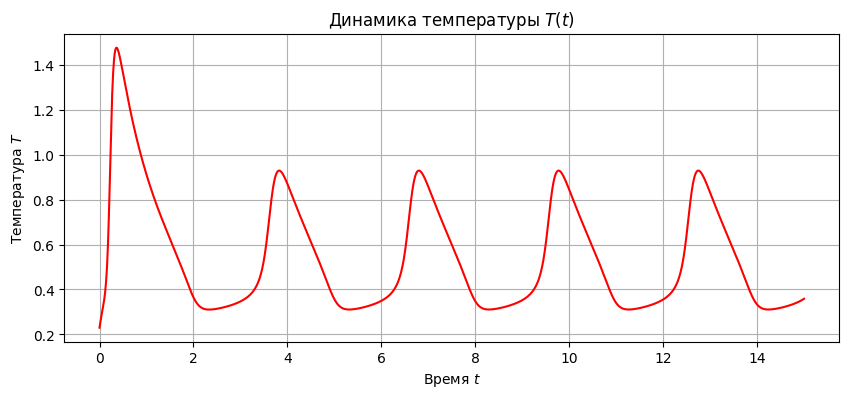

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
c0 = 120
T0 = 0.23
lmbda = 0.45
beta = 45

# Временной интервал
a = 0
b = 15
h = 0.01  # Шаг интегрирования
N = int((b - a) / h)

# Начальные условия
y0 = np.array([c0, T0], dtype=float)

# Правые части системы
def f(t, y):
    c, T = y
    dc = -c * np.exp(-1 / T) + lmbda * (c0 - c)
    dT = c * np.exp(-1 / T) + beta * (T0 - T)
    return np.array([dc, dT])

# Метод Мерсона
def merson(f, a, b, y0, h):
    t = a
    y = y0.copy()
    ts = [t]
    ys = [y.copy()]
    
    for _ in range(N):
        k1 = f(t, y)
        k2 = f(t + h/3, y + h*k1/3)
        k3 = f(t + h/3, y + h*k1/6 + h*k2/6)
        k4 = f(t + h/2, y + h*k1/8 + 3*h*k3/8)
        k5 = f(t + h,   y + h*k1/2 - 3*h*k3/2 + 2*h*k4)

        y_new = y + h * (k1 + 4*k4 + k5) / 6
        t += h
        
        ts.append(t)
        ys.append(y_new.copy())
        y = y_new
    
    return np.array(ts), np.array(ys)

# Вычисление
ts, ys = merson(f, a, b, y0, h)
cs = ys[:, 0]
Ts = ys[:, 1]

# === Графики ===

# 1. Фазовая траектория (c, T)
plt.figure(figsize=(10, 6))
plt.plot(cs, Ts, lw=1.5, color='green')
plt.title("Фазовая траектория: концентрация vs температура")
plt.xlabel("Концентрация $c$")
plt.ylabel("Температура $T$")
plt.grid(True)
plt.axis('equal')
plt.show()

# 2. Динамика концентрации во времени
plt.figure(figsize=(10, 4))
plt.plot(ts, cs, lw=1.5, color='blue')
plt.title("Динамика концентрации $c(t)$")
plt.xlabel("Время $t$")
plt.ylabel("Концентрация $c$")
plt.grid(True)
plt.show()

# 3. Динамика температуры во времени
plt.figure(figsize=(10, 4))
plt.plot(ts, Ts, lw=1.5, color='red')
plt.title("Динамика температуры $T(t)$")
plt.xlabel("Время $t$")
plt.ylabel("Температура $T$")
plt.grid(True)
plt.show()

ВТОРОЕ

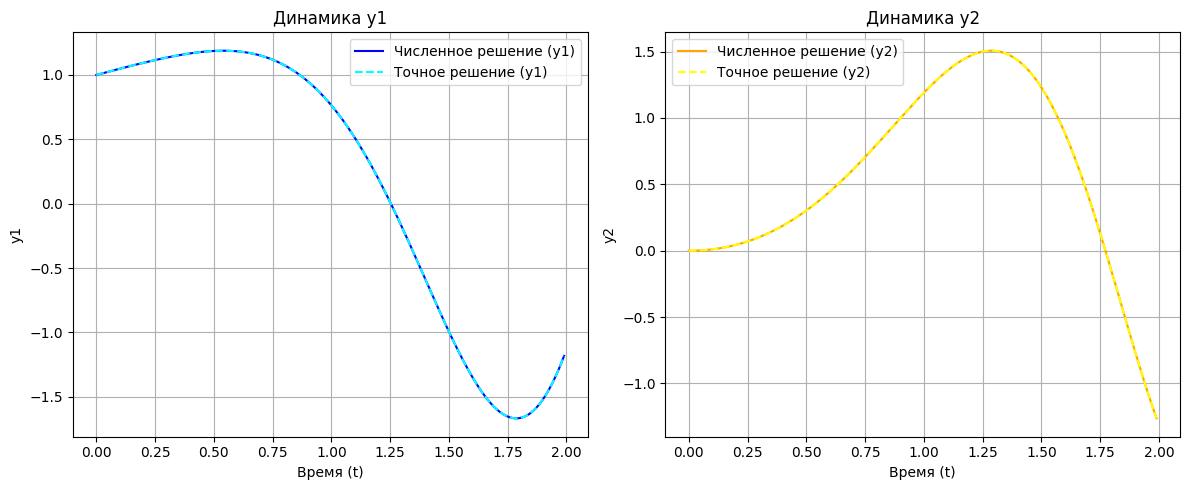

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Функция, определяющая систему уравнений
def f(t, y):
    y1, y2 = y
    # Уравнения
    dy1_dt = y1 / (2 + 2 * t) - 2 * t * y2
    dy2_dt = y2 / (2 + 2 * t) + 2 * t * y1
    
    return np.array([dy1_dt, dy2_dt])

# Метод Мерсона
def merson_method(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for n in range(len(t_values) - 1):
        tn = t_values[n]
        yn = y_values[n]

        k1 = f(tn, yn)
        k2 = f(tn + h/3, yn + h * k1 / 3)
        k3 = f(tn + h/3, yn + h * k1 / 6 + h * k2 / 6)
        k4 = f(tn + h/2, yn + h * k1 / 8 + 3 * h * k3 / 8)
        k5 = f(tn + h, yn + h * k1 / 2 - 3 * h * k3 / 2 + 2 * h * k4)

        yn1 = yn + h * (k1 + 4 * k4 + k5) / 6
        y_values[n + 1] = yn1

    return t_values, y_values

# Начальные условия
t0 = 0.0  # Начальное время
tn = 2.0  # Конечное время
h = 0.01  # Шаг интегрирования

# Точные начальные условия
y1_0 = np.cos(t0**2) / np.sqrt(1 + t0)
y2_0 = np.sin(t0**2) / np.sqrt(1 + t0)
y0 = np.array([y1_0, y2_0])

# Выполнение метода Мерсона
t_values, y_values = merson_method(f, y0, t0, tn, h)

# Вычисление точного решения для сравнения
exact_y1 = np.cos(t_values**2) * np.sqrt(1 + t_values)
exact_y2 = np.sin(t_values**2) * np.sqrt(1 + t_values)

# Визуализация результатов
plt.figure(figsize=(12, 5))

# График для y1
plt.subplot(1, 2, 1)
plt.plot(t_values, y_values[:, 0], label='Численное решение (y1)', color='blue')
plt.plot(t_values, exact_y1, label='Точное решение (y1)', linestyle='dashed', color='cyan')
plt.xlabel('Время (t)')
plt.ylabel('y1')
plt.title('Динамика y1')
plt.grid()
plt.legend()

# График для y2
plt.subplot(1, 2, 2)
plt.plot(t_values, y_values[:, 1], label='Численное решение (y2)', color='orange')
plt.plot(t_values, exact_y2, label='Точное решение (y2)', linestyle='dashed', color='yellow')
plt.xlabel('Время (t)')
plt.ylabel('y2')
plt.title('Динамика y2')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


ТРЕТЬЕ


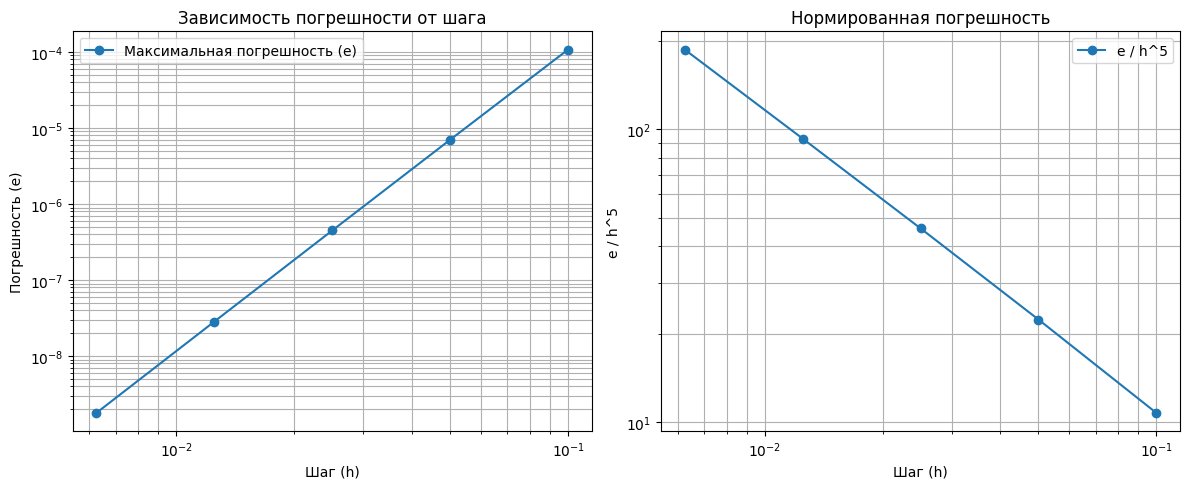

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    y1, y2 = y
    dy1_dt = y1 / (2 + 2 * t) - 2 * t * y2
    dy2_dt = y2 / (2 + 2 * t) + 2 * t * y1
    return np.array([dy1_dt, dy2_dt])

def exact_solution(t):
    y1 = np.cos(t**2) * np.sqrt(1 + t)
    y2 = np.sin(t**2) * np.sqrt(1 + t)
    return y1, y2

def merson_method(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for n in range(len(t_values) - 1):
        tn = t_values[n]
        yn = y_values[n]
        k1 = f(tn, yn)
        k2 = f(tn + h/3, yn + h * k1 / 3)
        k3 = f(tn + h/3, yn + h * k1 / 6 + h * k2 / 6)
        k4 = f(tn + h/2, yn + h * k1 / 8 + 3 * h * k3 / 8)
        k5 = f(tn + h, yn + h * k1 / 2 - 3 * h * k3 / 2 + 2 * h * k4)
        y_values[n + 1] = yn + h * (k1 + 4 * k4 + k5) / 6
    return t_values, y_values


t0, tn = 0.0, 2.0
h_list = [0.1, 0.05, 0.025, 0.0125, 0.00625]  
errors = []
errors_normalized = []

for h in h_list:
    t_num, y_num = merson_method(f, exact_solution(t0), t0, tn, h)
    y1_exact, y2_exact = exact_solution(t_num)
    error = np.max(np.abs(y_num - np.column_stack((y1_exact, y2_exact))))
    errors.append(error)
    errors_normalized.append(error / h**5)

# Графики
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(h_list, errors, 'o-', label='Максимальная погрешность (e)')
plt.xlabel('Шаг (h)')
plt.ylabel('Погрешность (e)')
plt.title('Зависимость погрешности от шага')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(h_list, errors_normalized, 'o-', label='e / h^5')
plt.xlabel('Шаг (h)')
plt.ylabel('e / h^5')
plt.title('Нормированная погрешность')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.tight_layout()
plt.show()

ЧЕТВЕРТОЕ

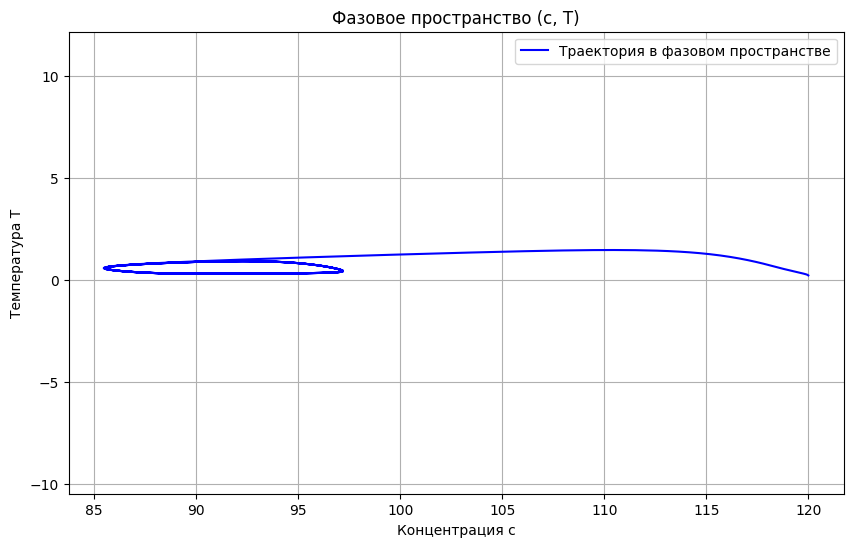

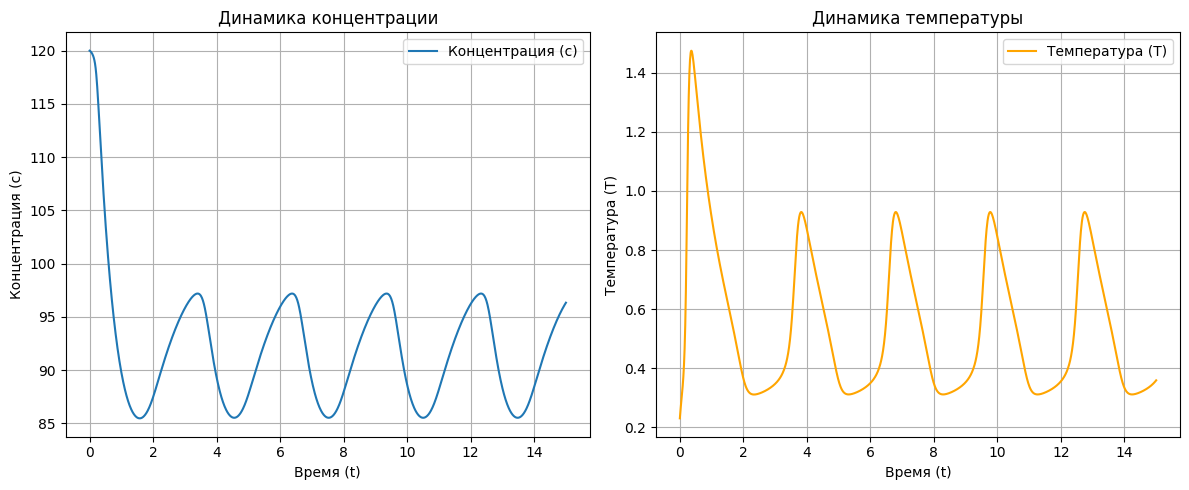

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
c0 = 120.0  # Начальная концентрация
T0 = 0.23   # Начальная температура
lambda_ = 0.45  # Параметр λ
beta = 45.0  # Параметр β
omega = beta-lambda_ 
TB = 0.5     # Пример значения T_B
Tst = 0.3    # Пример значения T_st

# Определяем систему уравнений
def f(t, y):
    c, T = y
    # Уравнения
    dc_dt = -c * np.exp(-1/T) + lambda_ * (c0 - c)
    dT_dt = c * np.exp(-1/T) + beta * (T0 - T)
    return np.array([dc_dt, dT_dt])

# Метод Мерсона
def merson_method(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for n in range(len(t_values) - 1):
        tn = t_values[n]
        yn = y_values[n]

        k1 = f(tn, yn)
        k2 = f(tn + h/3, yn + h * k1 / 3)
        k3 = f(tn + h/3, yn + h * k1 / 6 + h * k2 / 6)
        k4 = f(tn + h/2, yn + h * k1 / 8 + 3 * h * k3 / 8)
        k5 = f(tn + h, yn + h * k1 / 2 - 3 * h * k3 / 2 + 2 * h * k4)

        yn1 = yn + h * (k1 + 4 * k4 + k5) / 6
        y_values[n + 1] = yn1

    return t_values, y_values

# Начальные условия
y0 = np.array([c0, T0])
t0 = 0.0  # Начальное время
tn = 15.0  # Конечное время
h = 0.01  # Шаг интегрирования

# Решаем систему уравнений
t_values, y_values = merson_method(f, y0, t0, tn, h)

# Извлекаем c и T
c_values = y_values[:, 0]
T_values = y_values[:, 1]

# Построение графика в фазовом пространстве (c, T)
plt.figure(figsize=(10, 6))
plt.plot(c_values, T_values, label='Траектория в фазовом пространстве', color='blue')
plt.xlabel('Концентрация c')
plt.ylabel('Температура T')
plt.title('Фазовое пространство (c, T)')
plt.grid()
plt.legend()
plt.axis('equal')  # Одинаковый масштаб по осям
plt.show()

# Визуализация динамики c и T во времени
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t_values, c_values, label='Концентрация (c)')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация (c)')
plt.title('Динамика концентрации')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_values, T_values, label='Температура (T)', color='orange')
plt.xlabel('Время (t)')
plt.ylabel('Температура (T)')
plt.title('Динамика температуры')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


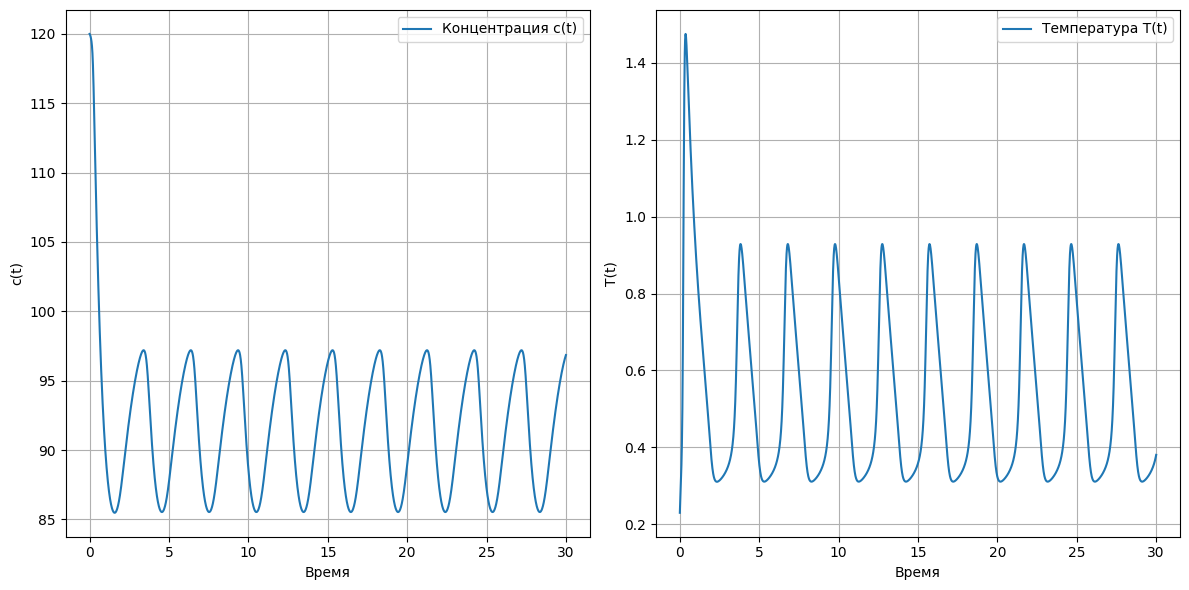

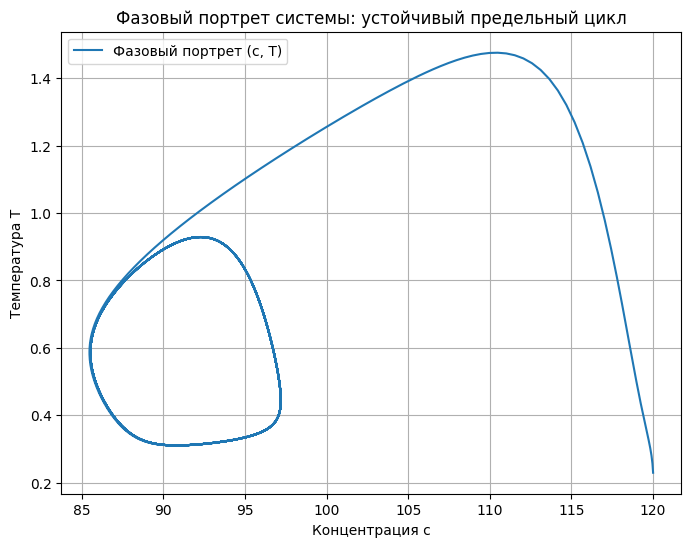

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def merson_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/3, y + h * k1 / 3)
    k3 = f(t + h/3, y + h * (k1/6 + k2/6))
    k4 = f(t + h/2, y + h * (k1/8 + 3*k3/8))
    k5 = f(t + h, y + h * (k1/2 - 3*k3/2 + 2*k4))
    
    y_new = y + h * (k1 + 4*k4 + k5) / 6
    return y_new

def solve_ode_merson(f, t_span, y0, h, n_steps):
    t0, tf = t_span
    t = np.linspace(t0, tf, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0
    
    for i in range(n_steps):
        y[i+1] = merson_step(f, t[i], y[i], h)
    
    return t, y

# Определение системы уравнений для химического реактора
def reactor_equations(t, y, c0=120, T0=0.23, λ=0.45, β=45):
    c, T = y
    dc_dt = -c * np.exp(-1/T) + λ * (c0 - c)
    dT_dt = c * np.exp(-1/T) + β * (T0 - T)
    return np.array([dc_dt, dT_dt])

# Параметры задачи
c0 = 120
T0 = 0.23
λ = 0.45
β = 45

# Начальные условия
y0 = np.array([c0, T0])

# Временной интервал и шаг
t_span = (0, 30)
h = 0.01  # Шаг интегрирования
n_steps = int((t_span[1] - t_span[0]) / h)

# Решение системы
t, y = solve_ode_merson(lambda t, y: reactor_equations(t, y, c0, T0, λ, β), 
                        t_span, y0, h, n_steps)

# Извлечение решений
c_solution = y[:, 0]
T_solution = y[:, 1]

# Построение графиков
plt.figure(figsize=(12, 6))

# Графики c(t) и T(t)
plt.subplot(1, 2, 1)
plt.plot(t, c_solution, label='Концентрация c(t)')
plt.xlabel('Время')
plt.ylabel('c(t)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, T_solution, label='Температура T(t)')
plt.xlabel('Время')
plt.ylabel('T(t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Фазовый портрет (c, T)
plt.figure(figsize=(8, 6))
plt.plot(c_solution, T_solution, label='Фазовый портрет (c, T)')
plt.xlabel('Концентрация c')
plt.ylabel('Температура T')
plt.title('Фазовый портрет системы: устойчивый предельный цикл')
plt.grid()
plt.legend()
plt.show()

ПЯТОЕ

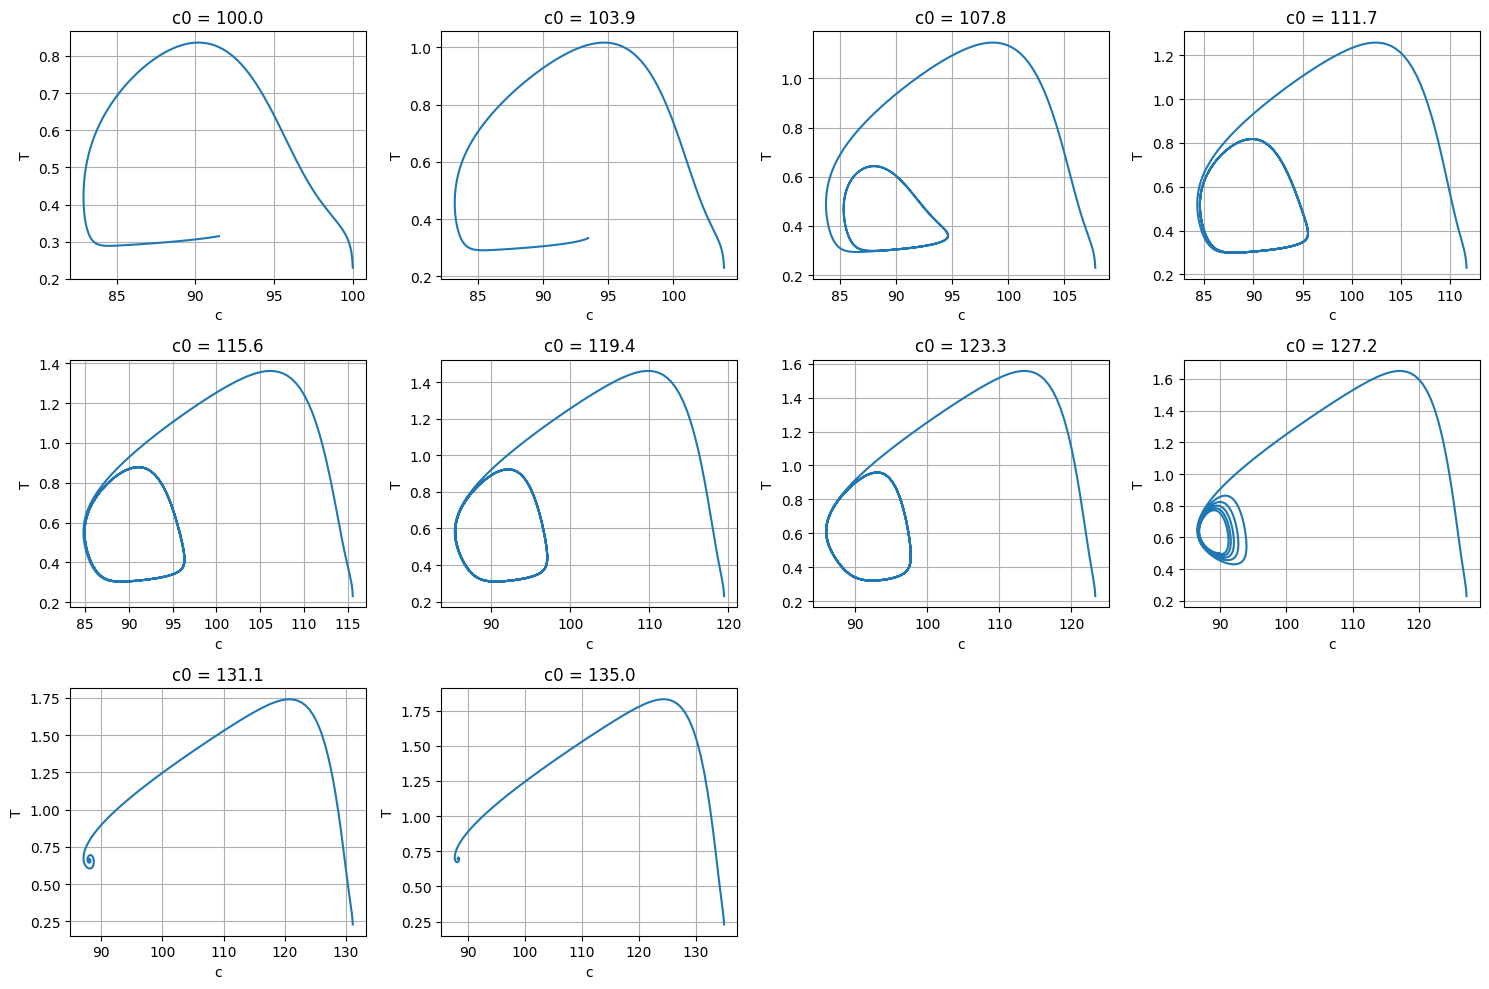

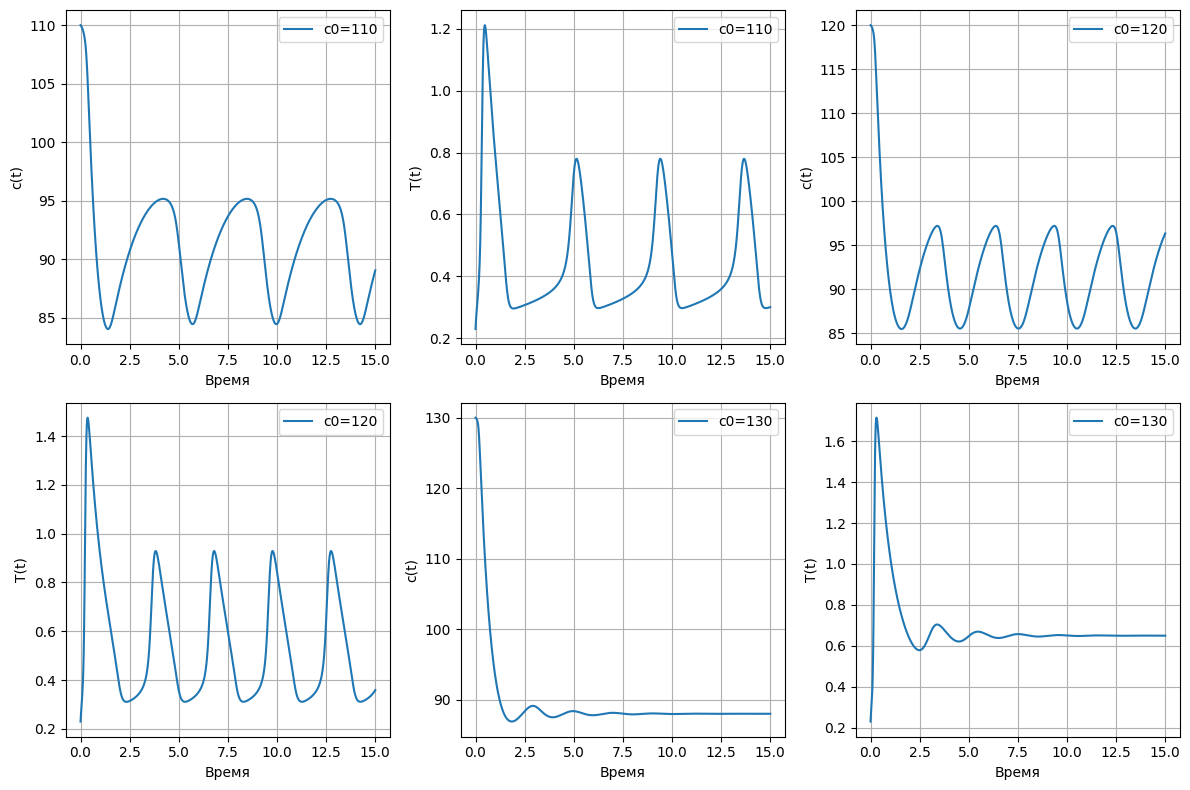

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def merson_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/3, y + h * k1 / 3)
    k3 = f(t + h/3, y + h * (k1/6 + k2/6))
    k4 = f(t + h/2, y + h * (k1/8 + 3*k3/8))
    k5 = f(t + h, y + h * (k1/2 - 3*k3/2 + 2*k4))
    return y + h * (k1 + 4*k4 + k5) / 6

def solve_ode(f, t_span, y0, h):
    t0, tf = t_span
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0
    for i in range(n_steps):
        y[i+1] = merson_step(f, t[i], y[i], h)
    return t, y

def reactor_equations(t, y, c0, T0=0.23, λ=0.45, β=45):
    c, T = y
    dc_dt = -c * np.exp(-1/T) + λ * (c0 - c)
    dT_dt = c * np.exp(-1/T) + β * (T0 - T)
    return np.array([dc_dt, dT_dt])

# Параметры
T0 = 0.23
λ = 0.45
β = 45
t_span = (0, 15)
h = 0.01

# Анализ для разных c0
c0_values = np.linspace(100, 135, 10)  # Исследуемые значения c0

plt.figure(figsize=(15, 10))
for i, c0 in enumerate(c0_values):
    y0 = np.array([c0, T0])
    t, y = solve_ode(lambda t, y: reactor_equations(t, y, c0, T0, λ, β), t_span, y0, h)
    c, T = y[:, 0], y[:, 1]
    
    # Фазовый портрет
    plt.subplot(3, 4, i+1)
    plt.plot(c, T, label=f'c0={c0:.1f}')
    plt.xlabel('c')
    plt.ylabel('T')
    plt.title(f'c0 = {c0:.1f}')
    plt.grid()

plt.tight_layout()
plt.show()

# Характерные временные зависимости для разных режимов
critical_c0 = [110, 120, 130]  # Примерные критические значения
plt.figure(figsize=(12, 8))
for i, c0 in enumerate(critical_c0):
    y0 = np.array([c0, T0])
    t, y = solve_ode(lambda t, y: reactor_equations(t, y, c0, T0, λ, β), t_span, y0, h)
    c, T = y[:, 0], y[:, 1]
    
    plt.subplot(2, 3, 2*i+1)
    plt.plot(t, c, label=f'c0={c0}')
    plt.xlabel('Время')
    plt.ylabel('c(t)')
    plt.legend()
    plt.grid()
    
    plt.subplot(2, 3, 2*i+2)
    plt.plot(t, T, label=f'c0={c0}')
    plt.xlabel('Время')
    plt.ylabel('T(t)')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

для c0 = 100.00


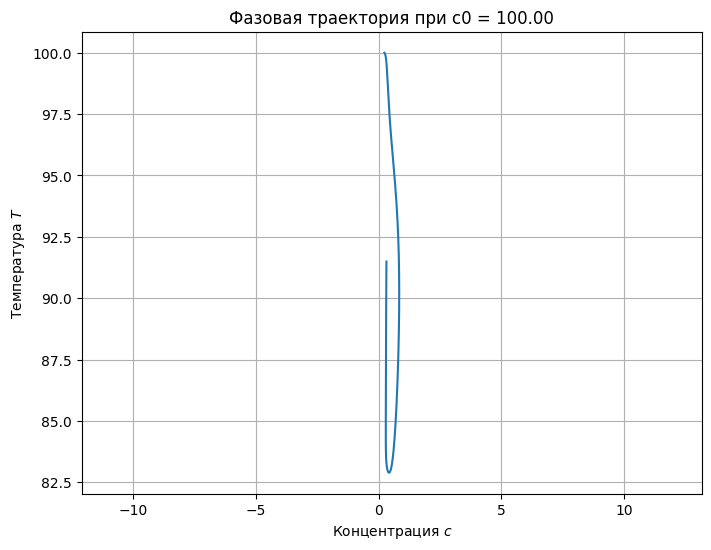

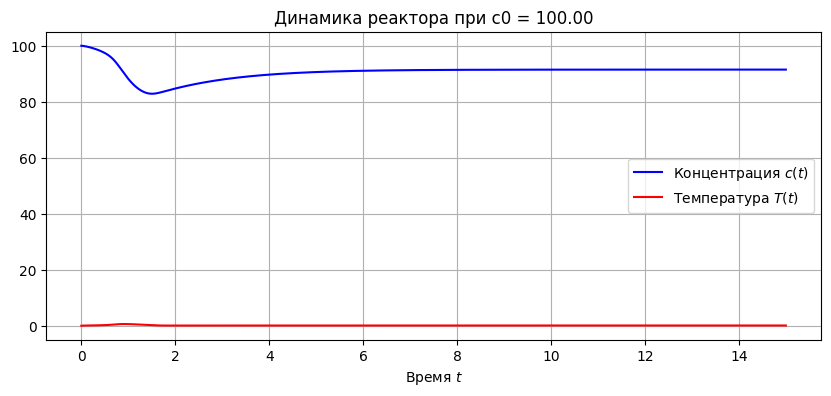

для c0 = 101.84


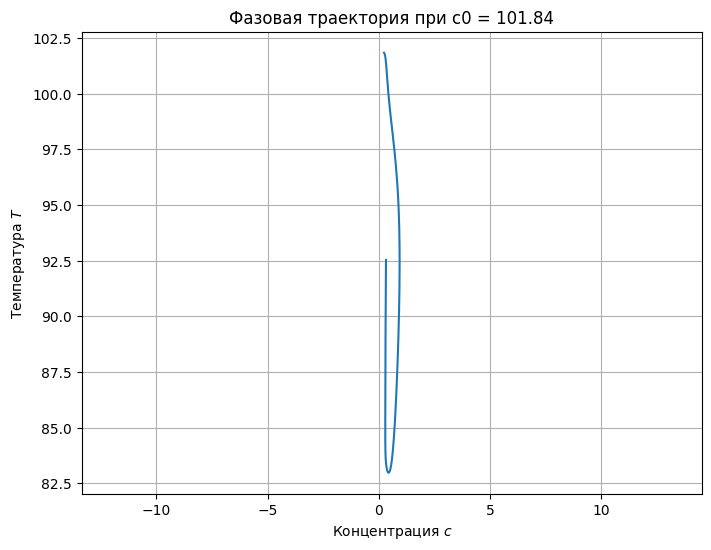

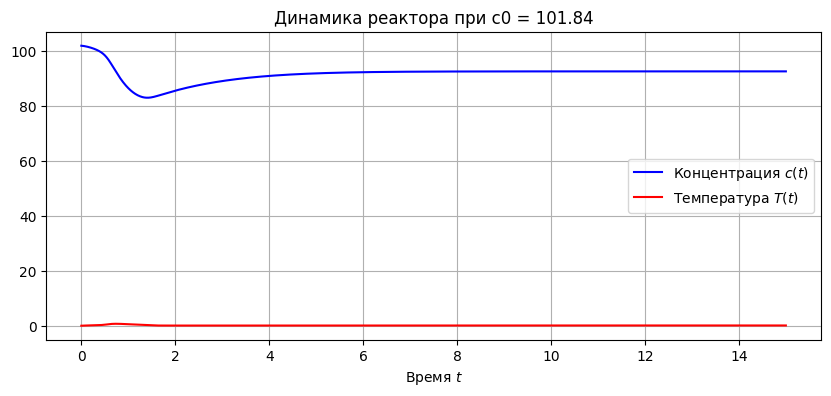

для c0 = 103.68


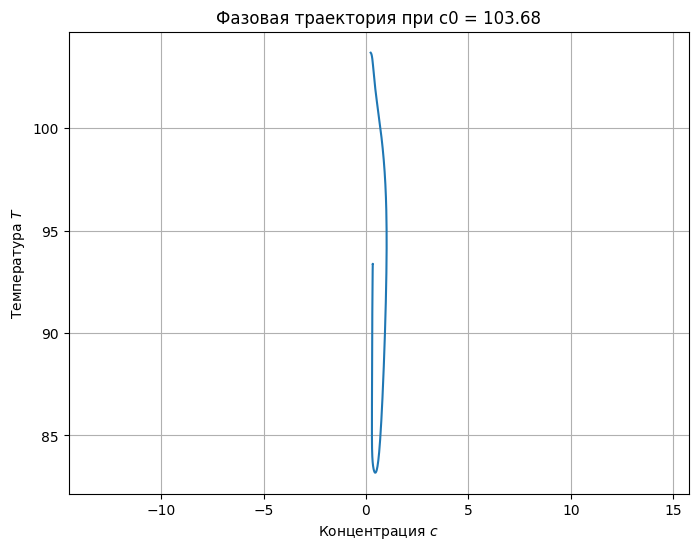

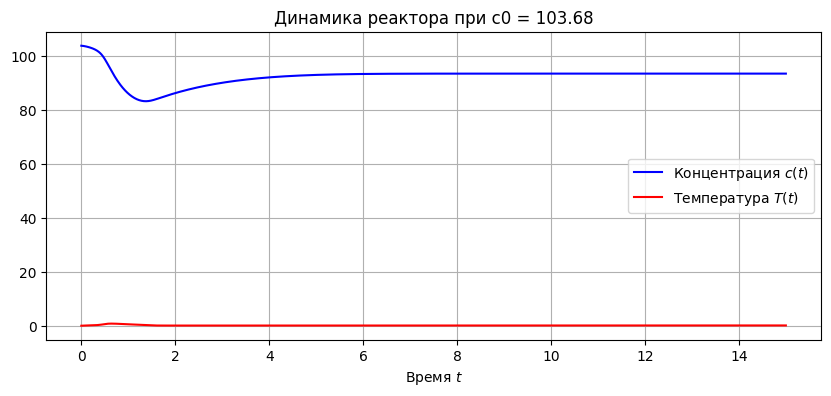

для c0 = 105.53


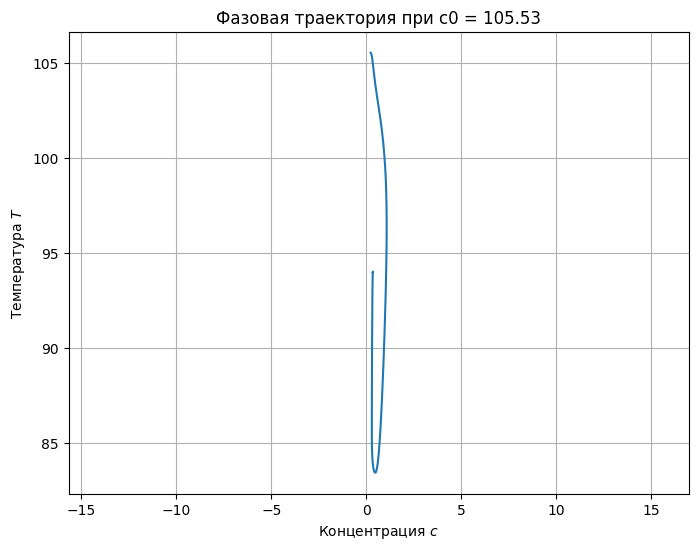

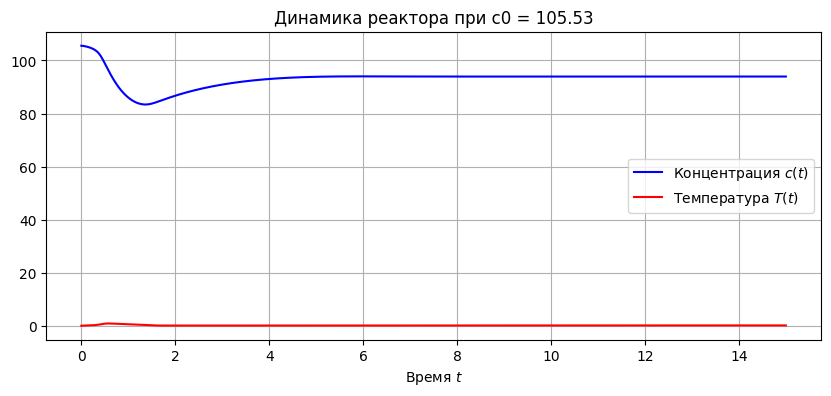

для c0 = 107.37


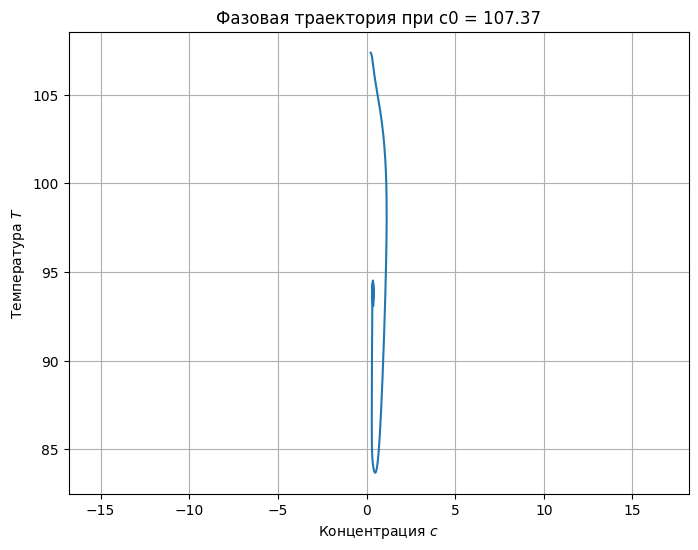

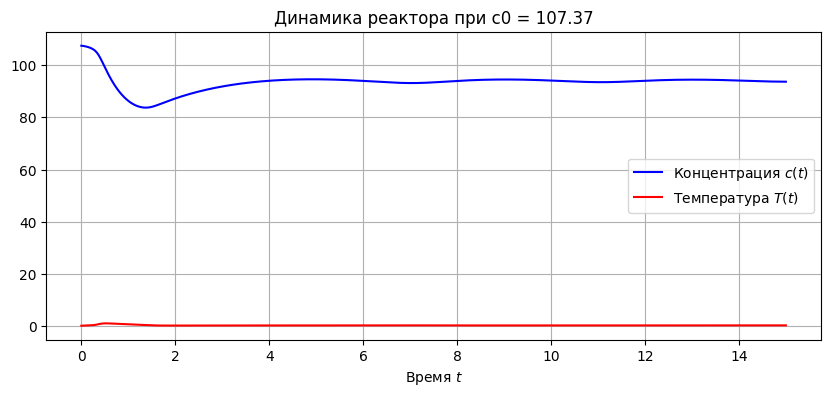

для c0 = 109.21


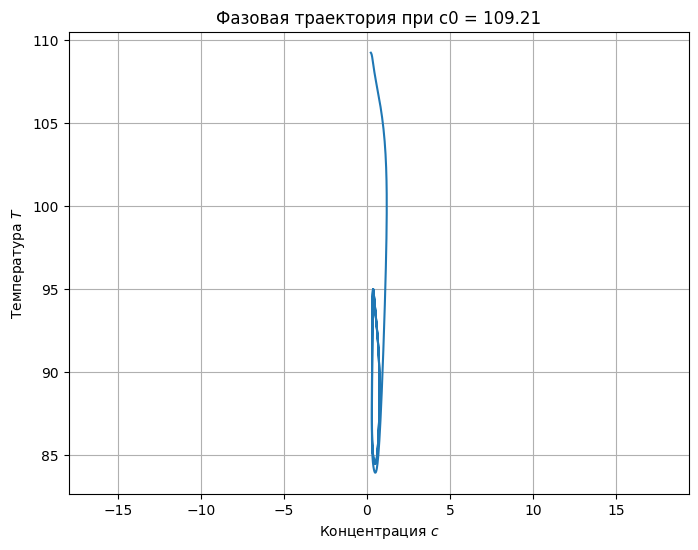

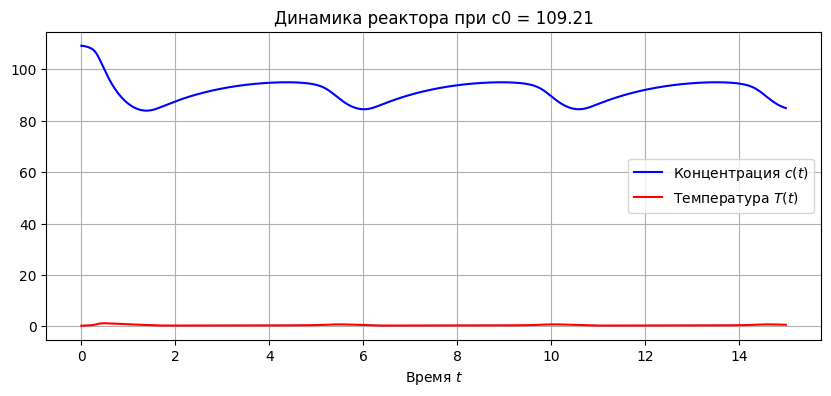

для c0 = 111.05


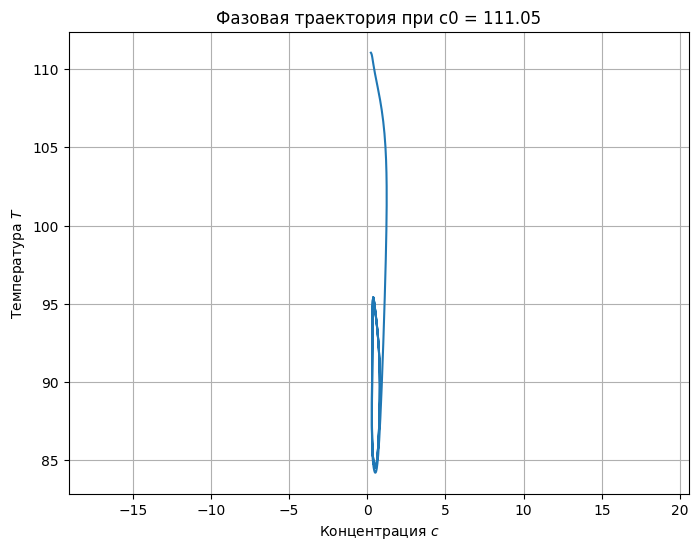

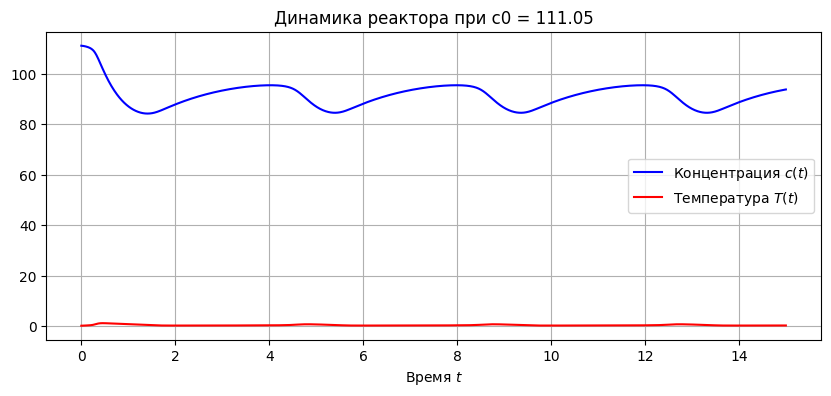

для c0 = 112.89


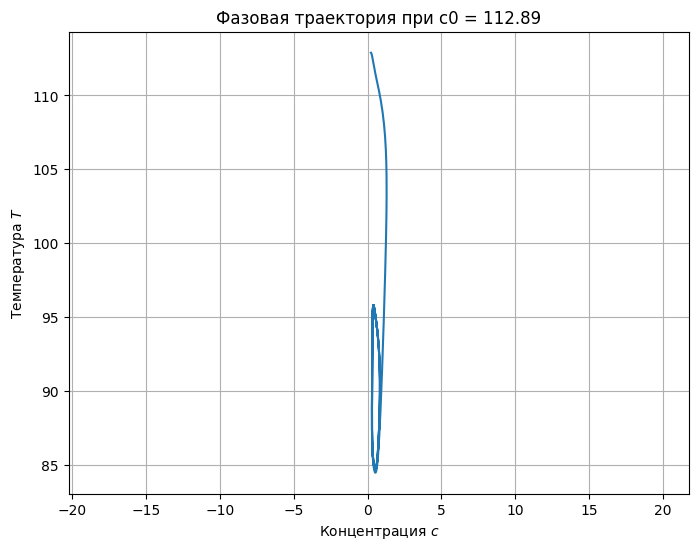

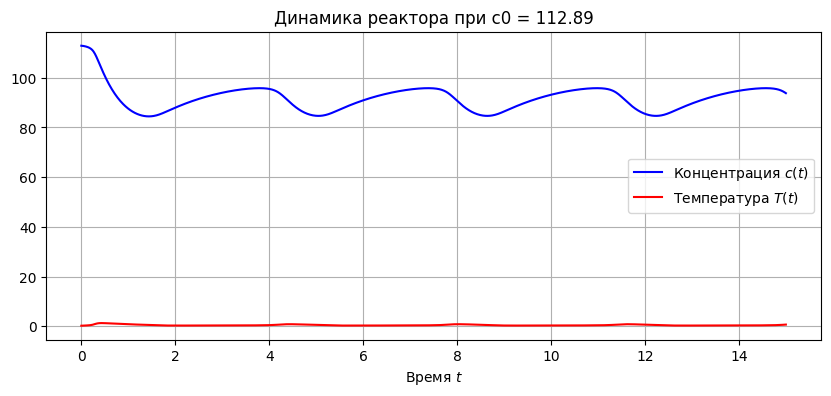

для c0 = 114.74


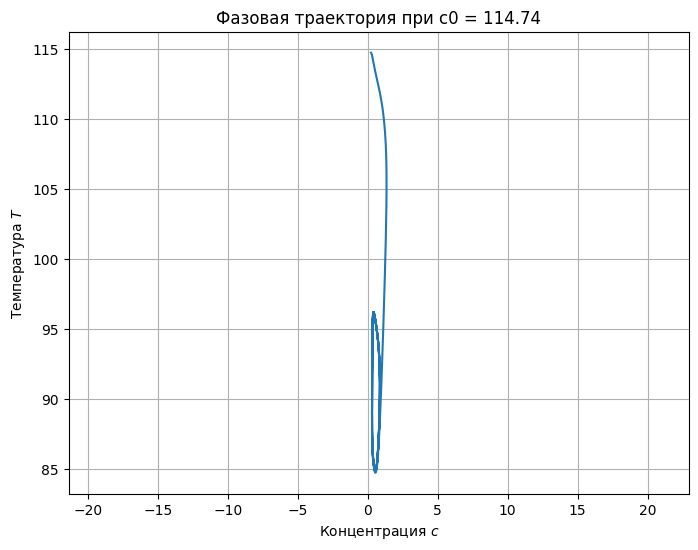

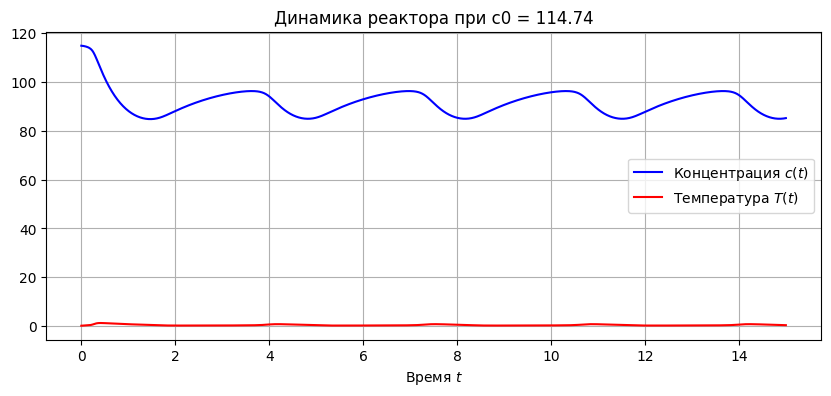

для c0 = 116.58


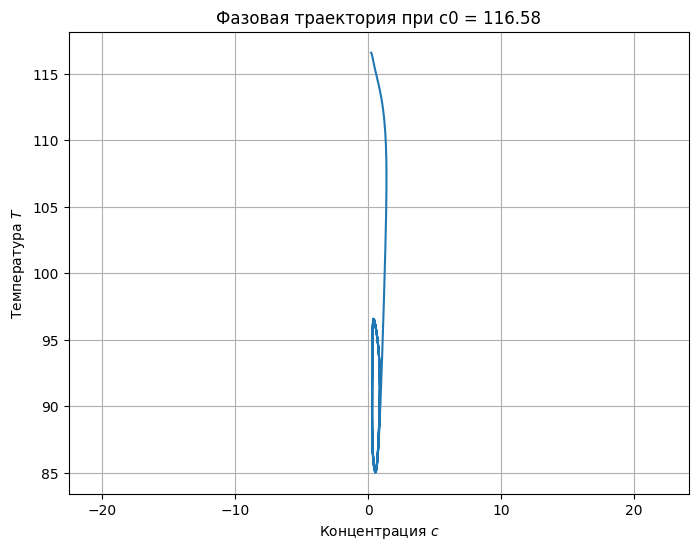

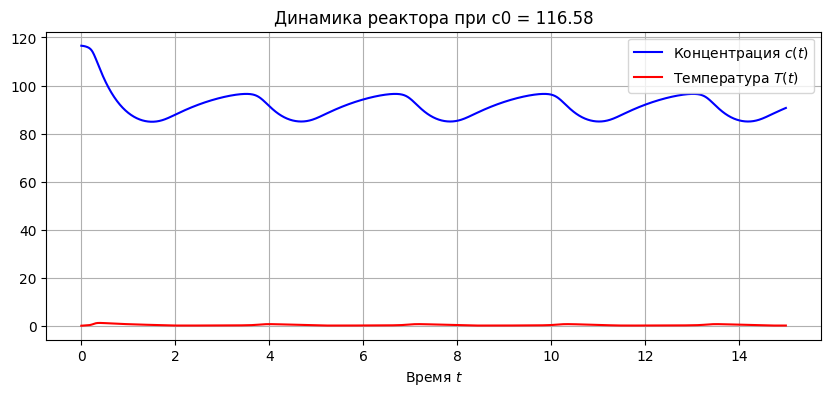

для c0 = 118.42


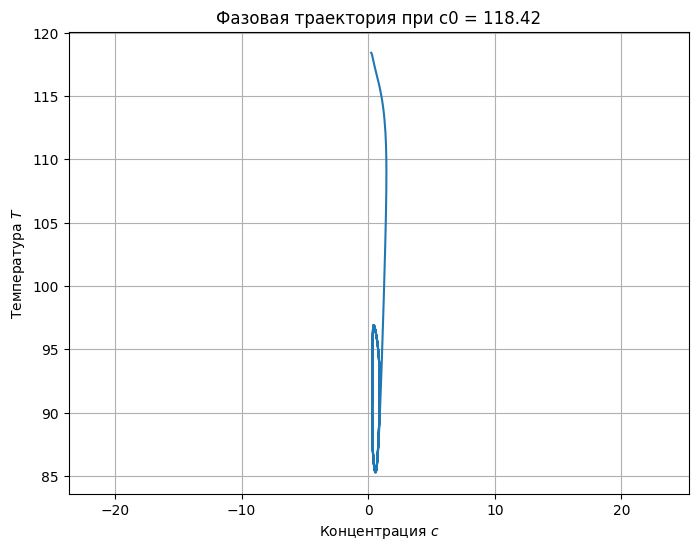

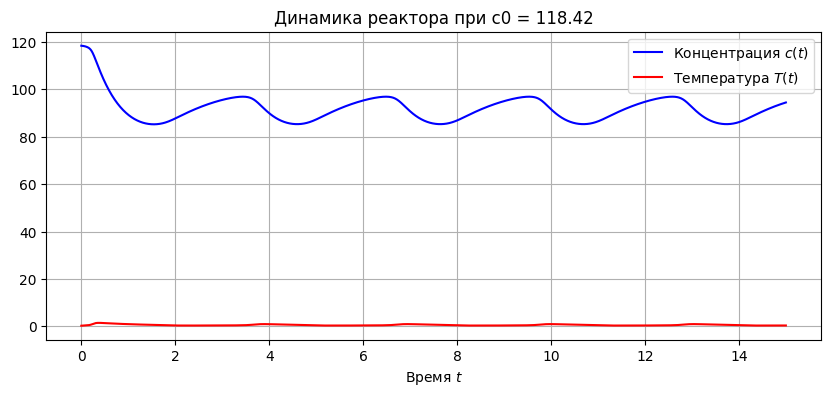

для c0 = 120.26


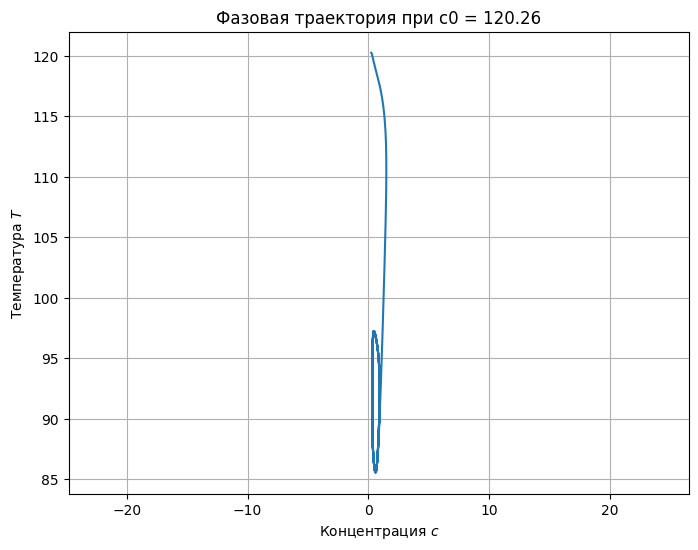

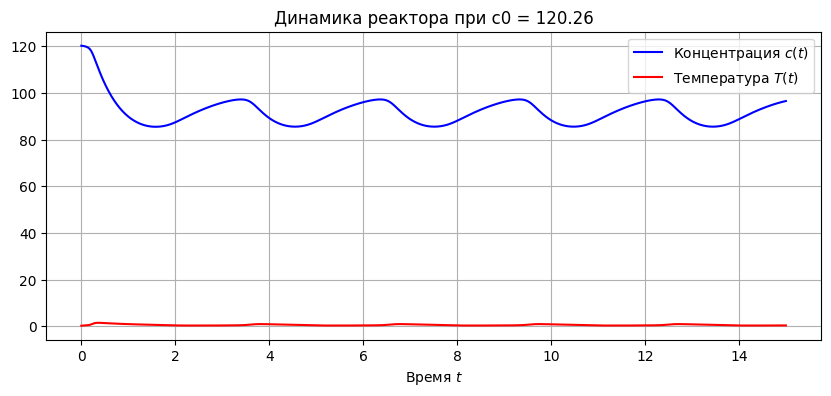

для c0 = 122.11


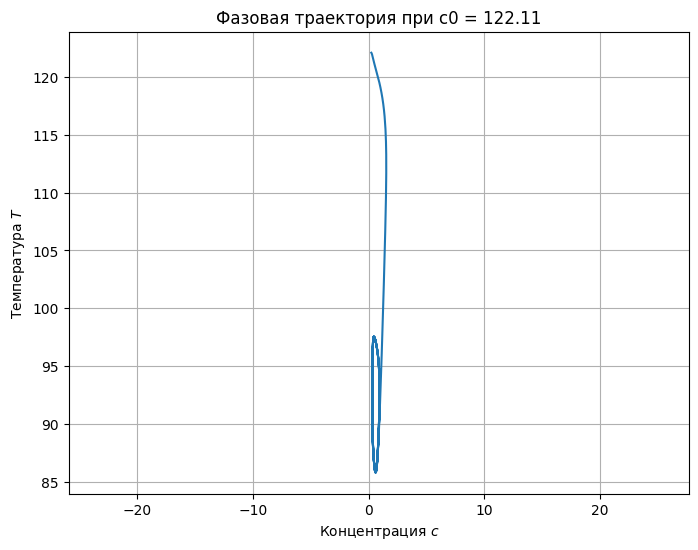

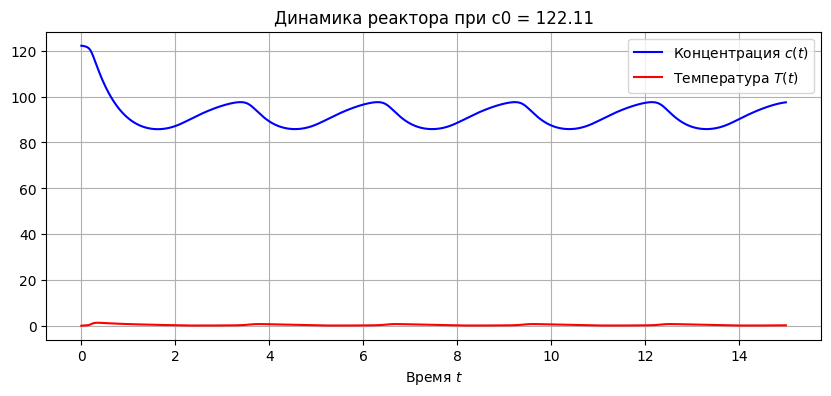

для c0 = 123.95


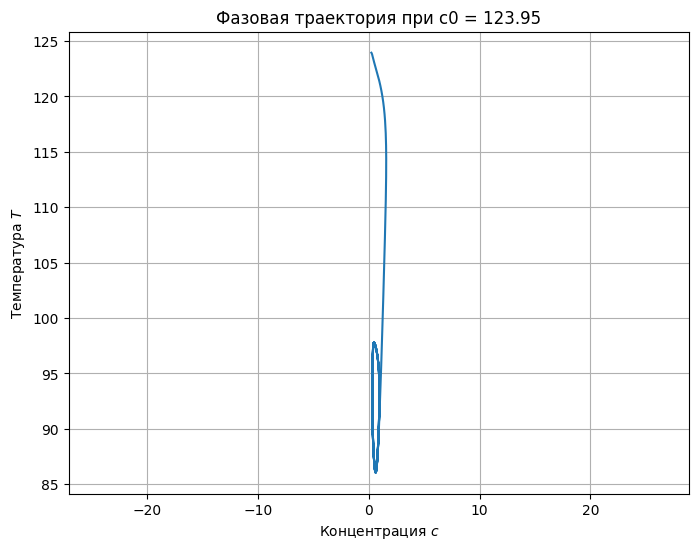

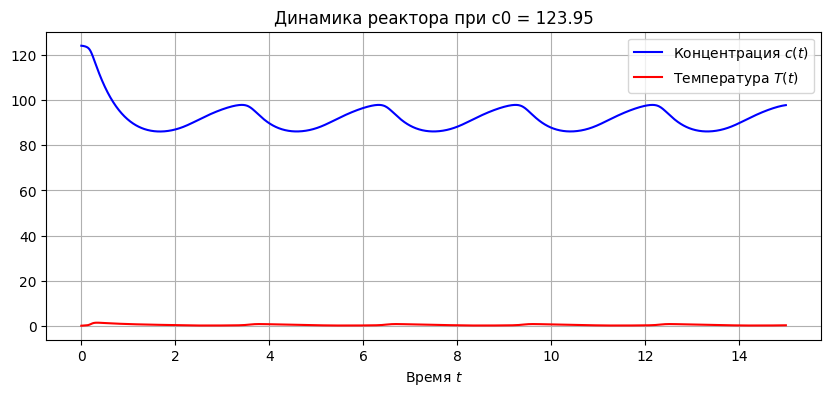

для c0 = 125.79


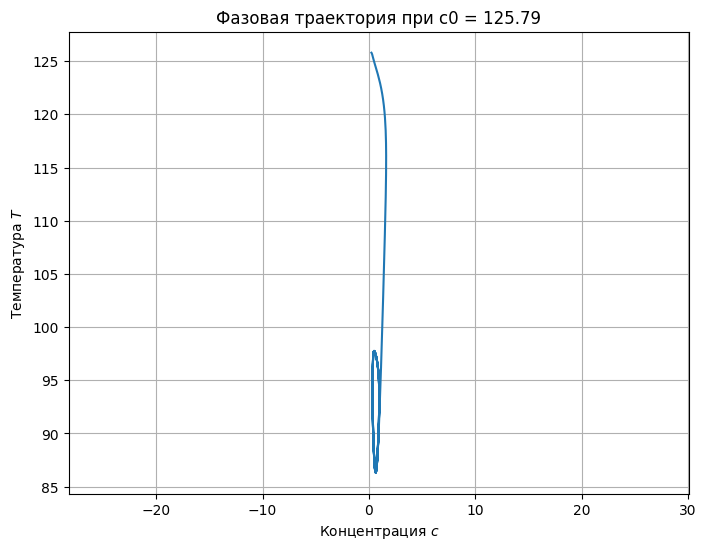

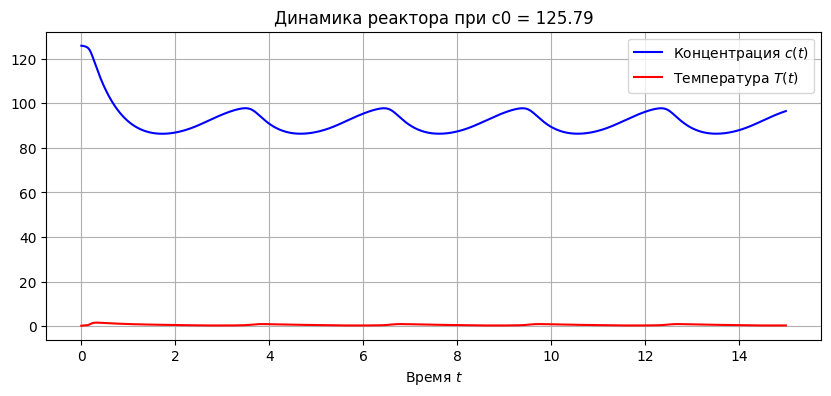

для c0 = 127.63


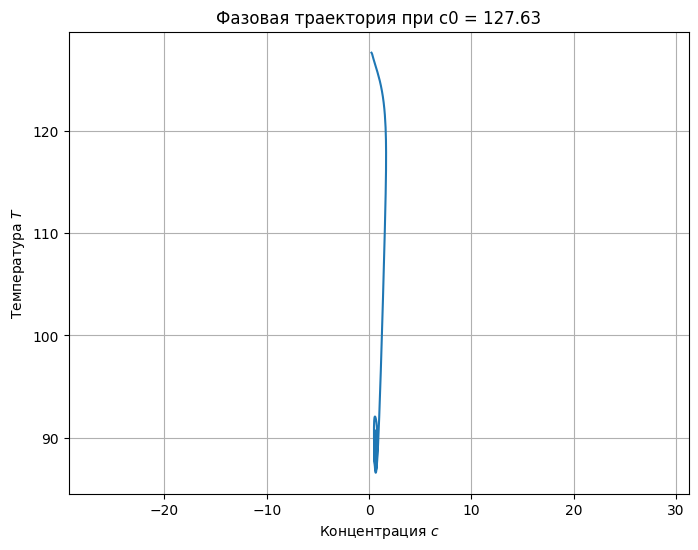

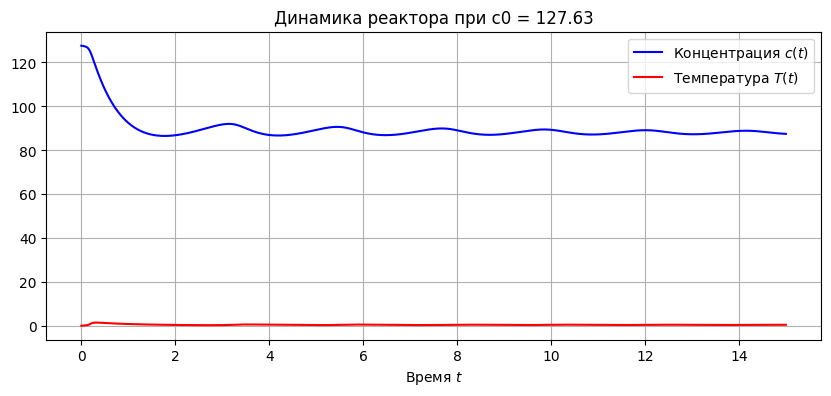

для c0 = 129.47


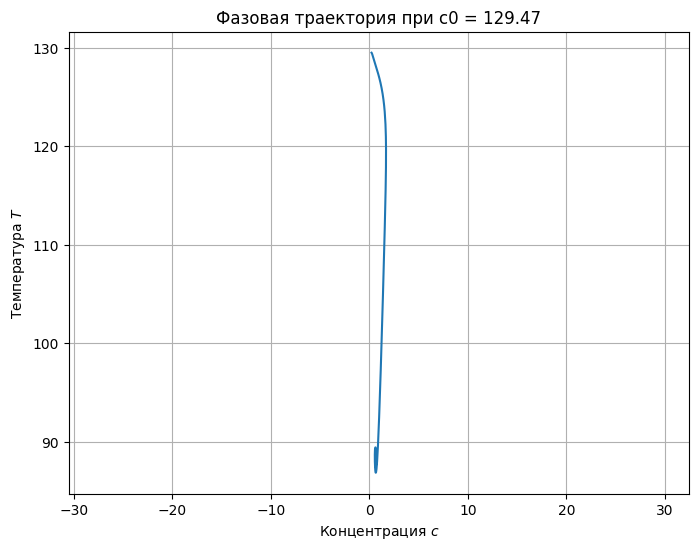

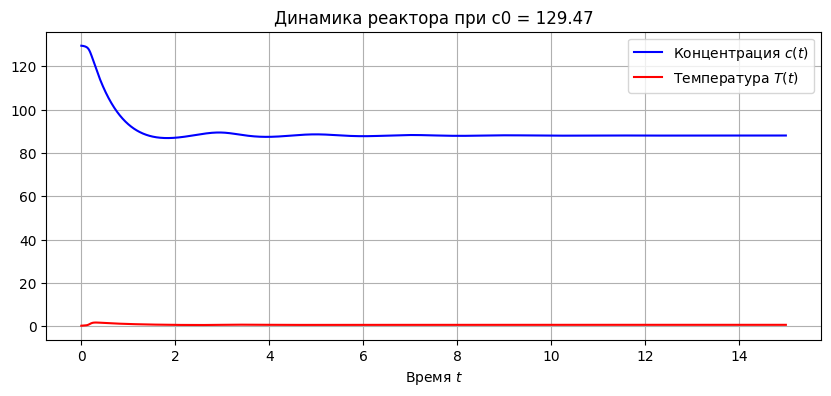

для c0 = 131.32


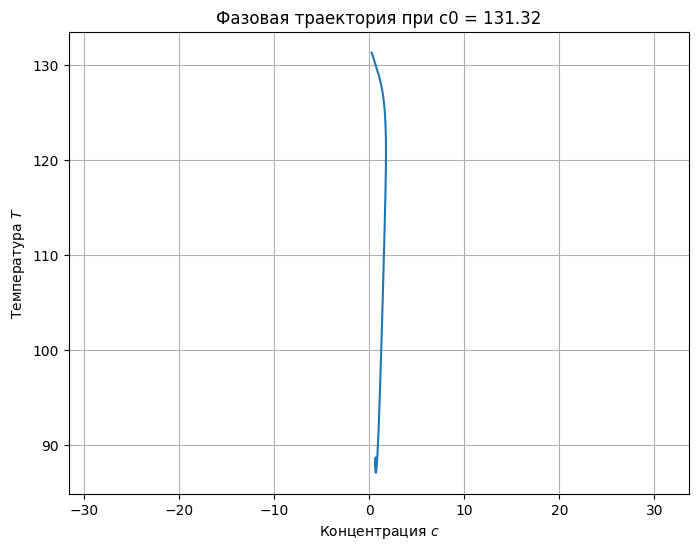

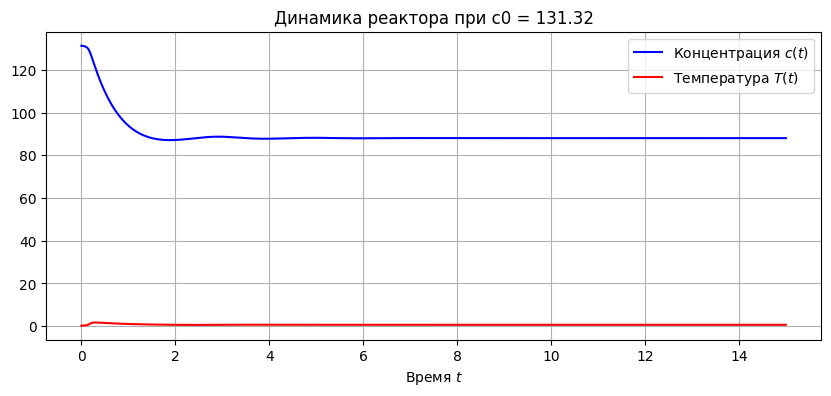

для c0 = 133.16


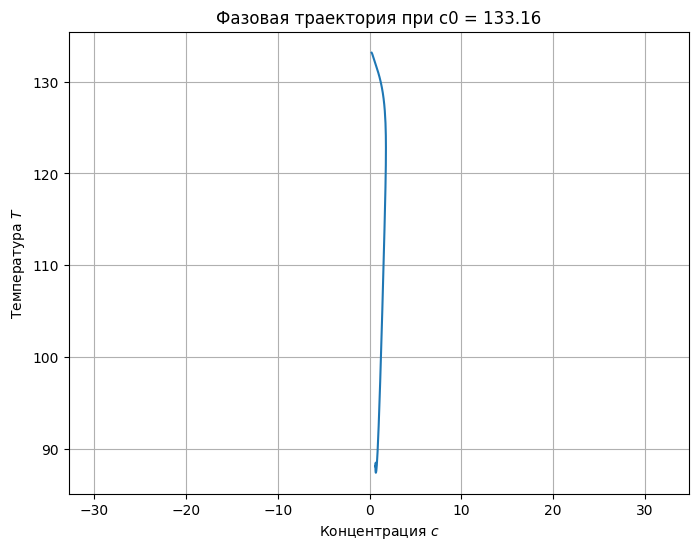

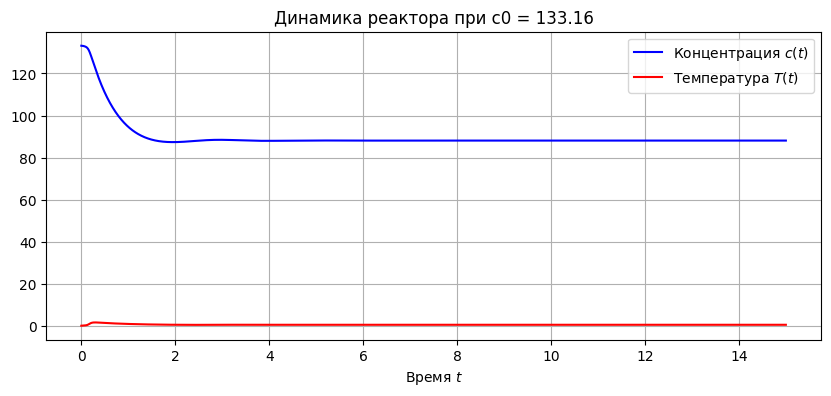

для c0 = 135.00


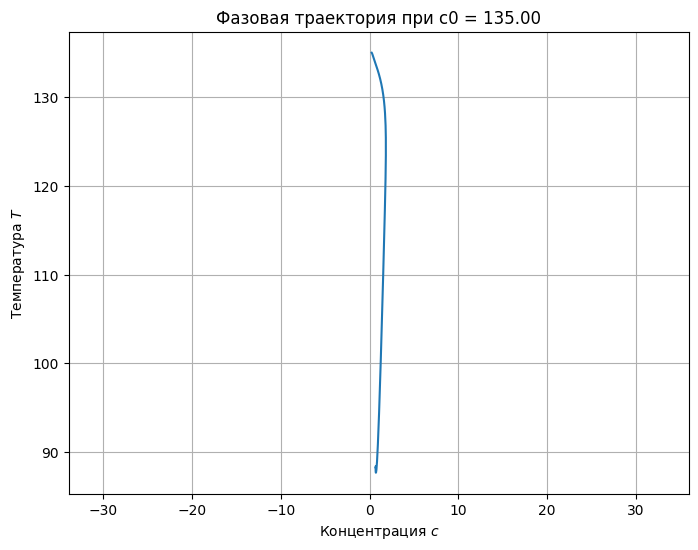

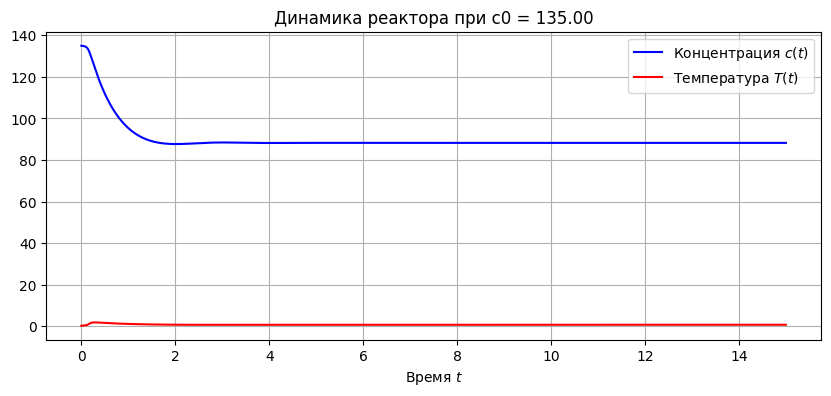

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 0.23
lmbda = 0.45
beta = 45
a = 0
b = 15
h = 0.01
N = int((b - a) / h)

c0_values = np.linspace(100, 135, 20)  

def f(t, y):
    c, T = y
    dc = -c * np.exp(-1 / T) + lmbda * (c0 - c)
    dT = c * np.exp(-1 / T) + beta * (T0 - T)
    return np.array([dc, dT])

# Метод Мерсона
def merson(f, a, b, y0, h):
    t = a
    y = y0.copy()
    ts = [t]
    ys = [y.copy()]
    
    for _ in range(N):
        k1 = f(t, y)
        k2 = f(t + h/3, y + h*k1/3)
        k3 = f(t + h/3, y + h*k1/6 + h*k2/6)
        k4 = f(t + h/2, y + h*k1/8 + 3*h*k3/8)
        k5 = f(t + h,   y + h*k1/2 - 3*h*k3/2 + 2*h*k4)

        y_new = y + h * (k1 + 4*k4 + k5) / 6
        t += h
        
        ts.append(t)
        ys.append(y_new.copy())
        y = y_new
    
    return np.array(ts), np.array(ys)

for c0 in c0_values:
    print(f"для c0 = {c0:.2f}")
    
    y0 = np.array([c0, T0], dtype=float)
    ts, ys = merson(f, a, b, y0, h)
    cs = ys[:, 0]
    Ts = ys[:, 1]

    # Фазовая траектория (c, T)
    plt.figure(figsize=(8, 6))
    plt.plot(Ts, cs, lw=1.5, label=f"c0 = {c0:.2f}")
    plt.title(f"Фазовая траектория при c0 = {c0:.2f}")
    plt.xlabel("Концентрация $c$")
    plt.ylabel("Температура $T$")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # Динамика во времени
    plt.figure(figsize=(10, 4))
    plt.plot(ts, cs, lw=1.5, label="Концентрация $c(t)$", color='blue')
    plt.plot(ts, Ts, lw=1.5, label="Температура $T(t)$", color='red')
    plt.title(f"Динамика реактора при c0 = {c0:.2f}")
    plt.xlabel("Время $t$")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np

# Параметры модели
T0_base = 0.23
lmbda = 0.45
beta = 45

# Временной интервал
a = 0
b = 15
h = 0.01
N = int((b - a) / h)

# Диапазон начальных концентраций
c0_values = np.linspace(100, 135, 36)  # 36 точек для поиска бифуркации

# Функция определения наличия осцилляций
def has_oscillations(data, threshold=0.005):
    """Оценивает наличие колебаний в конце временного ряда"""
    tail = data[-int(len(data)/5):]  # последние 20%
    variation = np.max(tail) - np.min(tail)
    return variation > threshold

# Правые части системы
def f(t, y, c0):
    c, T = y
    dc = -c * np.exp(-1 / T) + lmbda * (c0 - c)
    dT = c * np.exp(-1 / T) + beta * (T0_base - T)
    return np.array([dc, dT])

# Метод Мерсона
def merson(f, a, b, y0, h, c0):
    t = a
    y = y0.copy()
    for _ in range(N):
        k1 = f(t, y, c0)
        k2 = f(t + h/3, y + h*k1/3, c0)
        k3 = f(t + h/3, y + h*k1/6 + h*k2/6, c0)
        k4 = f(t + h/2, y + h*k1/8 + 3*h*k3/8, c0)
        k5 = f(t + h,   y + h*k1/2 - 3*h*k3/2 + 2*h*k4, c0)

        y = y + h * (k1 + 4*k4 + k5) / 6
        t += h
    return y

# === Цикл по c0 для поиска бифуркации ===
bif_found = False
bif_point = None

prev_cycle = False

for i, c0 in enumerate(c0_values):
    y0 = np.array([c0, T0_base], dtype=float)
    y_final = merson(f, a, b, y0, h, c0)
    
    # Интегрируем полностью для получения динамики
    ts = np.linspace(a, b, N+1)
    ys = []
    y = y0.copy()
    for _ in range(N):
        k1 = f(ts[_], y, c0)
        k2 = f(ts[_] + h/3, y + h*k1/3, c0)
        k3 = f(ts[_] + h/3, y + h*k1/6 + h*k2/6, c0)
        k4 = f(ts[_] + h/2, y + h*k1/8 + 3*h*k3/8, c0)
        k5 = f(ts[_] + h,   y + h*k1/2 - 3*h*k3/2 + 2*h*k4, c0)
        y = y + h * (k1 + 4*k4 + k5) / 6
        ys.append(y.copy())
    ys = np.array(ys)
    cs = ys[:, 0]
    Ts = ys[:, 1]

    current_cycle = has_oscillations(cs) or has_oscillations(Ts)

    if i > 0:
        if current_cycle != prev_cycle:
            print(f"Бифуркация между c0 = {c0_values[i-1]:.2f} и c0 = {c0:.2f}")
            bif_point = (c0_values[i-1] + c0) / 2
            bif_found = True
            break

    prev_cycle = current_cycle

# === Итог ===
if bif_found:
    print(f"\n Бифуркация Хопфа произошла при c0 ≈ {bif_point:.2f}")
else:
    print("\n Бифуркация не обнаружена.")

Бифуркация между c0 = 106.00 и c0 = 107.00

 Бифуркация Хопфа произошла при c0 ≈ 106.50


: 

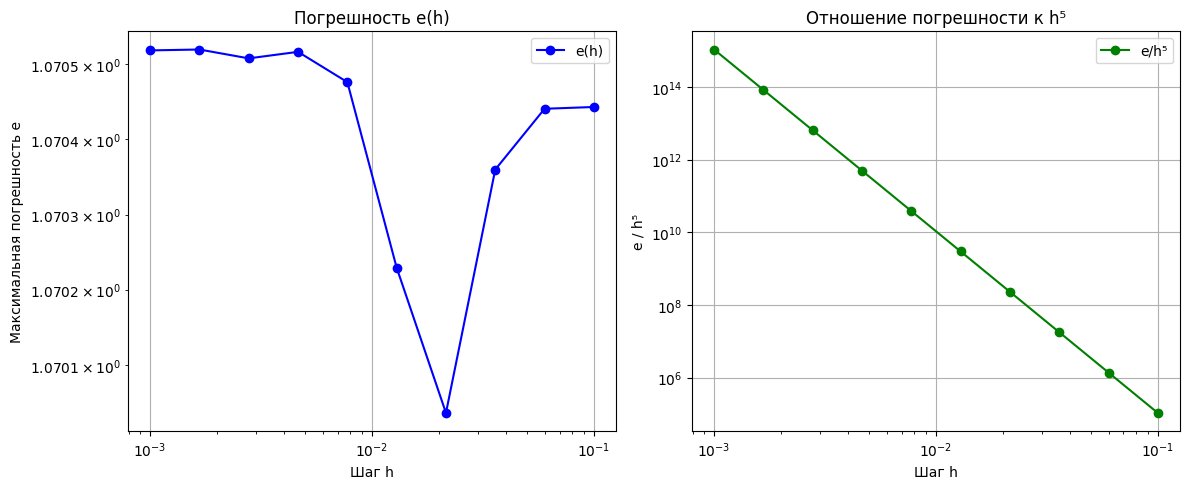

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция, определяющая систему уравнений
def f(t, y):
    y1, y2 = y
    dy1_dt = y1 / (2 + 2 * t) - 2 * t * y2
    dy2_dt = y2 / (2 + 2 * t) + 2 * t * y1
    return np.array([dy1_dt, dy2_dt])

# Метод Мерсона
def merson_method(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for n in range(len(t_values) - 1):
        tn = t_values[n]
        yn = y_values[n]

        k1 = f(tn, yn)
        k2 = f(tn + h/3, yn + h * k1 / 3)
        k3 = f(tn + h/3, yn + h * k1 / 6 + h * k2 / 6)
        k4 = f(tn + h/2, yn + h * k1 / 8 + 3 * h * k3 / 8)
        k5 = f(tn + h, yn + h * k1 / 2 - 3 * h * k3 / 2 + 2 * h * k4)

        yn1 = yn + h * (k1 + 4 * k4 + k5) / 6
        y_values[n + 1] = yn1

    return t_values, y_values

# Точное решение
def exact_solution(t):
    y1 = np.cos(t**2) / np.sqrt(1 + t)
    y2 = np.sin(t**2) / np.sqrt(1 + t)
    return np.column_stack((y1, y2))

# Начальные условия
t0 = 0.0
tn = 2.0
hs = np.logspace(-3, -1, 10)  # Разные шаги h от 0.001 до 0.1

errors = []
error_over_h5 = []

for h in hs:
    # Начальное значение y
    y1_0 = np.cos(t0**2) / np.sqrt(1 + t0)
    y2_0 = np.sin(t0**2) / np.sqrt(1 + t0)
    y0 = np.array([y1_0, y2_0])
    
    # Численное решение
    t_vals, y_vals = merson_method(f, y0, t0, tn, h)
    
    # Точное решение
    exact = exact_solution(t_vals)
    
    # Максимальная погрешность
    error = np.max(np.abs(y_vals - exact))
    errors.append(error)
    error_over_h5.append(error / (h**5))

# График максимальной погрешности от h
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(hs, errors, marker='o', linestyle='-', color='blue')
plt.xlabel('Шаг h')
plt.ylabel('Максимальная погрешность e')
plt.title('Погрешность e(h)')
plt.grid(True)
plt.legend(['e(h)'])

# График e / h^5 от h
plt.subplot(1, 2, 2)
plt.loglog(hs, error_over_h5, marker='o', linestyle='-', color='green')
plt.xlabel('Шаг h')
plt.ylabel('e / h⁵')
plt.title('Отношение погрешности к h⁵')
plt.grid(True)
plt.legend(['e/h⁵'])

plt.tight_layout()
plt.show()

       h         e(h)        e/h^4        α
0.1000000000 0.0001077552 1.0775515724 3.9413
0.0500000000 0.0000070144 1.1223068985 3.9662
0.0250000000 0.0000004488 1.1488905608 3.9822
0.0125000000 0.0000000284 1.1631733560 3.9909
0.0062500000 0.0000000018 1.1705503857 3.9954
0.0031250000 0.0000000001 1.1743116193 3.9978
0.0015625000 0.0000000000 1.1760741472    --  


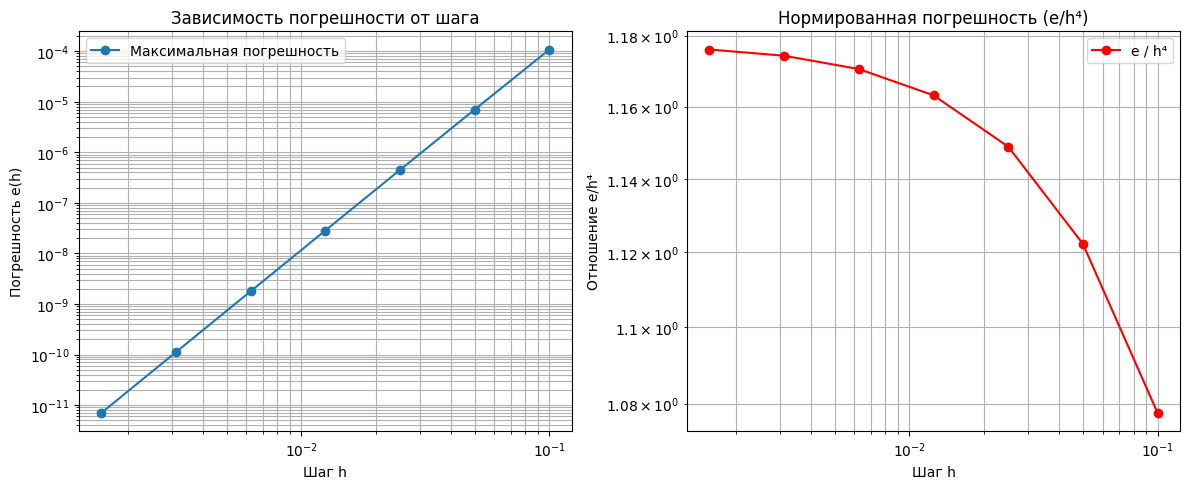

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Система ОДУ
def f(t, y):
    y1, y2 = y
    dy1_dt = y1 / (2 + 2 * t) - 2 * t * y2
    dy2_dt = y2 / (2 + 2 * t) + 2 * t * y1
    return np.array([dy1_dt, dy2_dt])

# Точное решение
def exact_solution(t):
    y1 = np.cos(t**2) * np.sqrt(1 + t)
    y2 = np.sin(t**2) * np.sqrt(1 + t)
    return y1, y2

# Метод Мерсона (4-й порядок)
def merson_method(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for n in range(len(t_values) - 1):
        tn = t_values[n]
        yn = y_values[n]
        k1 = f(tn, yn)
        k2 = f(tn + h/3, yn + h * k1 / 3)
        k3 = f(tn + h/3, yn + h * k1 / 6 + h * k2 / 6)
        k4 = f(tn + h/2, yn + h * k1 / 8 + 3 * h * k3 / 8)
        k5 = f(tn + h, yn + h * k1 / 2 - 3 * h * k3 / 2 + 2 * h * k4)
        y_values[n + 1] = yn + h * (k1 + 4 * k4 + k5) / 6
    return t_values, y_values


# Параметры
t0, tn = 0.0, 2.0
h_list = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
errors = []
errors_normalized = []
alphas = []

# Вычисление ошибок
for h in h_list:
    t_num, y_num = merson_method(f, exact_solution(t0), t0, tn, h)
    y1_exact, y2_exact = exact_solution(t_num)
    error = np.max(np.abs(y_num - np.column_stack((y1_exact, y2_exact))))
    errors.append(error)
    errors_normalized.append(error / h**4)  # ← Исправлено: делим на h^4

# Расчёт α
for i in range(len(h_list)-1):
    alpha = np.log(errors[i]/errors[i+1]) / np.log(h_list[i]/h_list[i+1])
    alphas.append(alpha)

# Вывод таблицы
print(f"{'h':>8} {'e(h)':>12} {'e/h^4':>12} {'α':>8}")
for i, h in enumerate(h_list):
    a_str = f"{alphas[i]:.4f}" if i < len(alphas) else "   --  "
    print(f"{h:8.10f} {errors[i]:12.10f} {errors_normalized[i]:12.10f} {a_str}")

# === Графики ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(h_list, errors, 'o-', label='Максимальная погрешность')
plt.xlabel('Шаг h')
plt.ylabel('Погрешность e(h)')
plt.title('Зависимость погрешности от шага')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(h_list, errors_normalized, 'ro-', label='e / h⁴')
plt.xlabel('Шаг h')
plt.ylabel('Отношение e/h⁴')
plt.title('Нормированная погрешность (e/h⁴)')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Система ОДУ
def f(t, y):
    y1, y2 = y
    dy1_dt = y1 / (2 + 2 * t) - 2 * t * y2
    dy2_dt = y2 / (2 + 2 * t) + 2 * t * y1
    return np.array([dy1_dt, dy2_dt])

# Точное решение
def exact_solution(t):
    y1 = np.cos(t**2) * np.sqrt(1 + t)
    y2 = np.sin(t**2) * np.sqrt(1 + t)
    return y1, y2


def merson_method(f, y0, t0, tn, h):
    t_values = np.arange(t0, tn + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for n in range(len(t_values) - 1):
        tn = t_values[n]
        yn = y_values[n]
        k1 = f(tn, yn)
        k2 = f(tn + h/3, yn + h * k1 / 3)
        k3 = f(tn + h/3, yn + h * k1 / 6 + h * k2 / 6)
        k4 = f(tn + h/2, yn + h * k1 / 8 + 3 * h * k3 / 8)
        k5 = f(tn + h, yn + h * k1 / 2 - 3 * h * k3 / 2 + 2 * h * k4)
        y_values[n + 1] = yn + h * (k1 + 4 * k4 + k5) / 6
    return t_values, y_values



t0, tn = 0.0, 2.0
h_list = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
errors = []
errors_normalized = []
alphas = []


for h in h_list:
    t_num, y_num = merson_method(f, exact_solution(t0), t0, tn, h)
    y1_exact, y2_exact = exact_solution(t_num)
    error = np.max(np.abs(y_num - np.column_stack((y1_exact, y2_exact))))
    errors.append(error)
    errors_normalized.append(error / h**4)  

# Расчёт α
for i in range(len(h_list)-1):
    alpha = np.log(errors[i]/errors[i+1]) / np.log(h_list[i]/h_list[i+1])
    alphas.append(alpha)


print(f"{'h':>8} {'e(h)':>12} {'e/h^4':>12} {'α':>8}")
for i, h in enumerate(h_list):
    a_str = f"{alphas[i]:.4f}" if i < len(alphas) else "   --  "
    print(f"{h:8.10f} {errors[i]:12.10f} {errors_normalized[i]:12.10f} {a_str}")



       h         e(h)        e/h^4        α
0.1000000000 0.0001077552 1.0775515724 3.9413
0.0500000000 0.0000070144 1.1223068985 3.9662
0.0250000000 0.0000004488 1.1488905608 3.9822
0.0125000000 0.0000000284 1.1631733560 3.9909
0.0062500000 0.0000000018 1.1705503857 3.9954
0.0031250000 0.0000000001 1.1743116193 3.9978
0.0015625000 0.0000000000 1.1760741472    --  
